In [1]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [8]:
df.isnull().any()

baseline value                                            False
accelerations                                             False
fetal_movement                                            False
uterine_contractions                                      False
light_decelerations                                       False
severe_decelerations                                      False
prolongued_decelerations                                  False
abnormal_short_term_variability                           False
mean_value_of_short_term_variability                      False
percentage_of_time_with_abnormal_long_term_variability    False
mean_value_of_long_term_variability                       False
histogram_width                                           False
histogram_min                                             False
histogram_max                                             False
histogram_number_of_peaks                                 False
histogram_number_of_zeroes              

In [18]:
X=df
X=X.drop(columns=['fetal_health'])
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [19]:
Y=df["fetal_health"]
Y.head()

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: fetal_health, dtype: float64

# Fetal Health: 1-normal, 2-suspect, 3-pathological

In [20]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1594, 21)
(532, 21)
(1594,)
(532,)


In [24]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [26]:
predictions=model.predict(X_test)

In [80]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.96      0.80      0.88       410
         2.0       0.44      0.82      0.57        72
         3.0       0.61      0.68      0.64        50

    accuracy                           0.80       532
   macro avg       0.67      0.77      0.70       532
weighted avg       0.86      0.80      0.81       532

0.7951127819548872


In [31]:
!echo "# CIS4496" >> README.md
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/nomias/CIS4496.git
!git push -u origin main

Initialized empty Git repository in C:/Users/saish/anaconda3/CIS 4496/Lab 01/.git/
[master (root-commit) f3acaa5] first commit
 1 file changed, 1 insertion(+)
 create mode 100644 README.md
Branch 'main' set up to track remote branch 'main' from 'origin'.


To https://github.com/nomias/CIS4496.git
 * [new branch]      main -> main


In [32]:
!git commit -m "Lab01"
!git push

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Lab01.ipynb
	fetal_health.csv

nothing added to commit but untracked files present (use "git add" to track)


Everything up-to-date


In [33]:
!git add Lab01.ipynb
!git add fetal_health.csv
!git commit -m "lab01 and csv"
!git push

The file will have its original line endings in your working directory
The file will have its original line endings in your working directory


[main e9eafae] lab01 and csv
 2 files changed, 2904 insertions(+)
 create mode 100644 Lab01.ipynb
 create mode 100644 fetal_health.csv


To https://github.com/nomias/CIS4496.git
   f3acaa5..e9eafae  main -> main


In [35]:
df.drop("fetal_health", axis=1).apply(lambda x: x.corr(df.fetal_health))

baseline value                                            0.148151
accelerations                                            -0.364066
fetal_movement                                            0.088010
uterine_contractions                                     -0.204894
light_decelerations                                       0.058870
severe_decelerations                                      0.131934
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
mean_value_of_short_term_variability                     -0.103382
percentage_of_time_with_abnormal_long_term_variability    0.426146
mean_value_of_long_term_variability                      -0.226797
histogram_width                                          -0.068789
histogram_min                                             0.063175
histogram_max                                            -0.045265
histogram_number_of_peaks                                -0.02

# prolongued_decelerations,
# abnormal_short_term_variability,
# percentage_of_time_with_abnormal_long_term_variability

<AxesSubplot:xlabel='prolongued_decelerations', ylabel='[fetal_health]'>

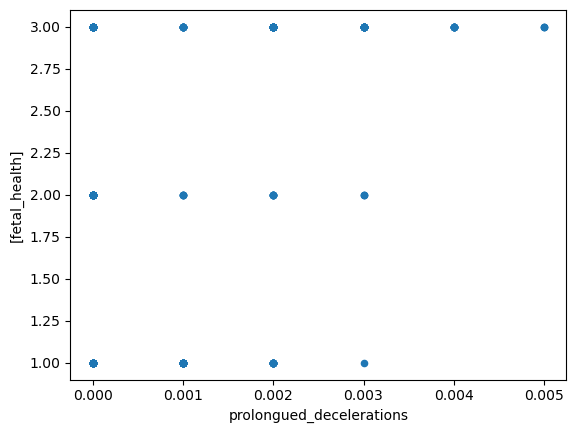

In [76]:
import matplotlib.pyplot as plt
df.plot(x="prolongued_decelerations",y=['fetal_health'],kind='scatter')

<AxesSubplot:xlabel='abnormal_short_term_variability', ylabel='[fetal_health]'>

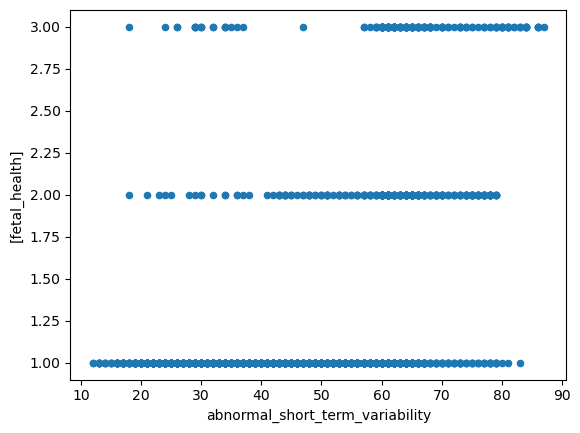

In [74]:
df.plot(x="abnormal_short_term_variability",y=['fetal_health'],kind='scatter')

<AxesSubplot:xlabel='percentage_of_time_with_abnormal_long_term_variability', ylabel='[fetal_health]'>

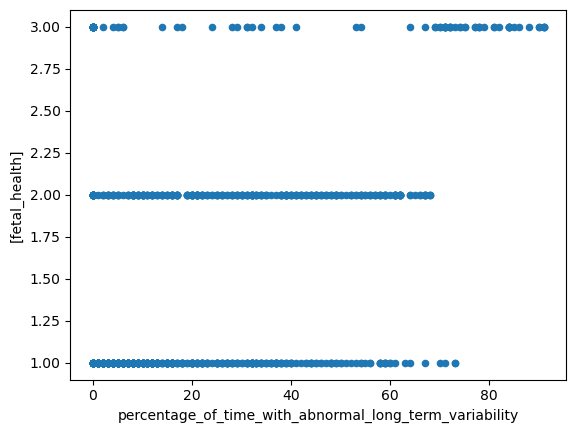

In [73]:
df.plot(x="percentage_of_time_with_abnormal_long_term_variability",y=['fetal_health'],kind='scatter')

<AxesSubplot:xlabel='baseline value', ylabel='[fetal_health]'>

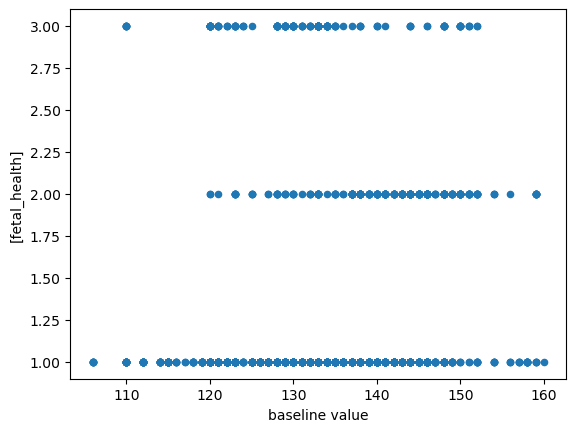

In [75]:
df.plot(x="baseline value",y=['fetal_health'],kind='scatter')

In [85]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
pred=clf.predict(X_test)

In [86]:
print(classification_report(Y_test,pred))
print(accuracy_score(Y_test,pred))

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       410
         2.0       0.84      0.71      0.77        72
         3.0       0.92      0.90      0.91        50

    accuracy                           0.94       532
   macro avg       0.90      0.86      0.88       532
weighted avg       0.93      0.94      0.93       532

0.9360902255639098


In [84]:
!git add Lab01.ipynb
!git commit -m "Plots and RandomForest"
!git push

The file will have its original line endings in your working directory


[main e3f5f55] Plots and RandomForest
 1 file changed, 312 insertions(+), 17 deletions(-)


To https://github.com/nomias/CIS4496.git
   e9eafae..e3f5f55  main -> main


In [89]:
from sklearn import svm
model2=svm.SVC(kernel='linear')
model2.fit(X,Y)
pred2=model2.predict(X_test)

In [90]:
print(classification_report(Y_test,pred2))
print(accuracy_score(Y_test,pred2))

              precision    recall  f1-score   support

         1.0       0.92      0.97      0.94       410
         2.0       0.71      0.56      0.63        72
         3.0       0.91      0.82      0.86        50

    accuracy                           0.90       532
   macro avg       0.85      0.78      0.81       532
weighted avg       0.89      0.90      0.89       532

0.8984962406015038


In [91]:
!git add Lab01.ipynb
!git commit -m "SVM"
!git push

The file will have its original line endings in your working directory


[main 796939f] SVM
 1 file changed, 94 insertions(+), 50 deletions(-)


To https://github.com/nomias/CIS4496.git
   e3f5f55..796939f  main -> main


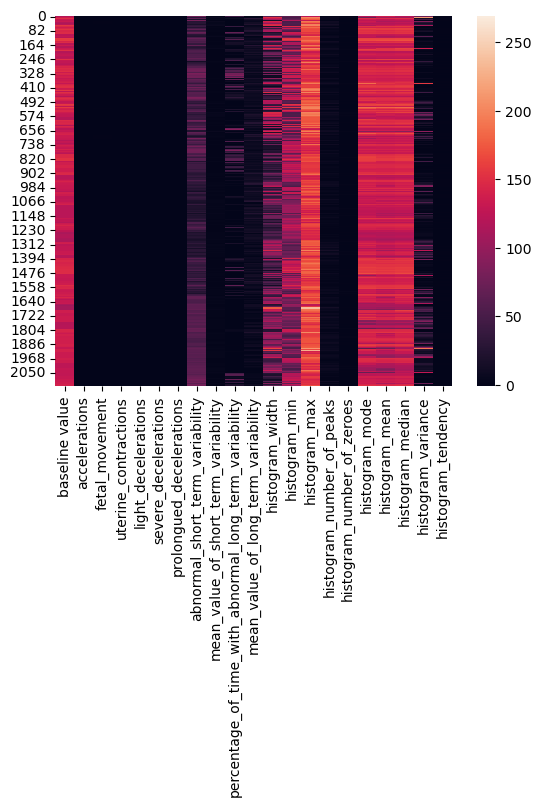

In [95]:
import seaborn as sn
hm=sn.heatmap(data=X)

<AxesSubplot:>

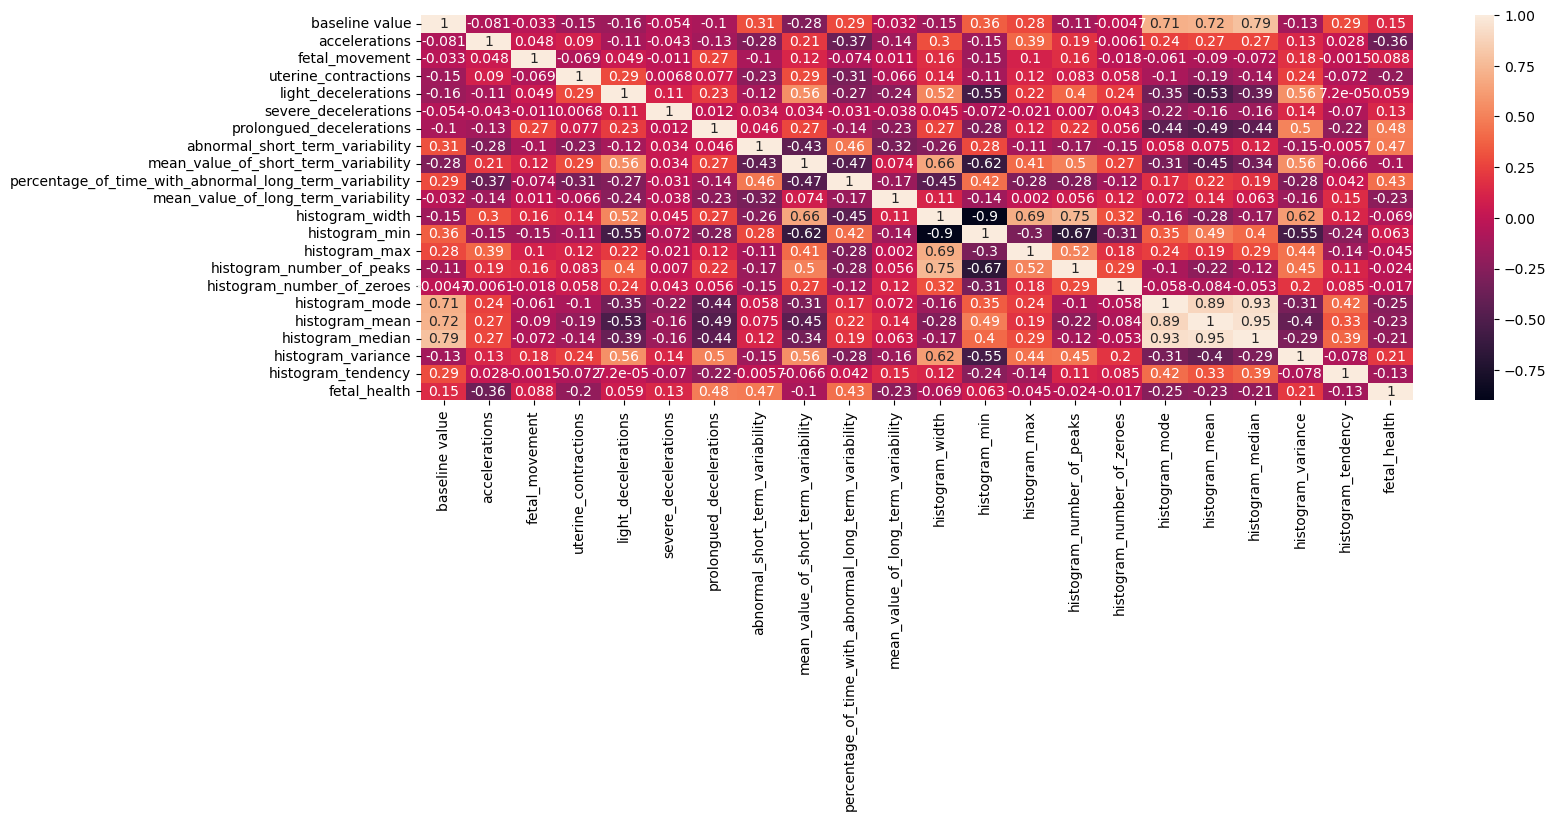

In [102]:
plt.figure(figsize = (16,5))
corr = df.select_dtypes('number').corr()
sn.heatmap(corr,annot=True)

In [ ]:
!git add Lab01.ipynb
!git commit -m "HeatMap"
!git push